In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fpath = '../results/trained_models/final_baseline/trained_model.pth'
model = torch.load(fpath)
model

OrderedDict([('_conv_stem.weight',
              tensor([[[[-2.9346e-01, -3.0957e-01, -3.6743e-02],
                        [-2.9785e-01, -3.0737e-01, -1.9012e-02],
                        [-3.0396e-02, -1.7414e-03,  2.0862e-01]],
              
                       [[-6.2598e-01, -6.3281e-01,  1.6455e-01],
                        [-6.2988e-01, -6.2207e-01,  1.6602e-01],
                        [ 1.5027e-01,  1.3879e-01,  1.1823e-01]],
              
                       [[ 1.6992e+00,  1.7002e+00, -4.2700e-01],
                        [ 1.6953e+00,  1.6904e+00, -4.2773e-01],
                        [-3.5474e-01, -3.5767e-01, -2.6221e-01]]],
              
              
                      [[[ 1.6172e+00,  1.6035e+00, -2.2803e-01],
                        [ 1.6143e+00,  1.6025e+00, -2.3706e-01],
                        [-2.0898e-01, -2.0947e-01, -1.7810e-01]],
              
                       [[-7.8662e-01, -7.8809e-01,  1.0706e-01],
                        [-7.9199e-01, -7

In [3]:
def plotting(weights, length):
    fig = plt.figure(figsize=(7, 5))
    plt.plot(range(len(weights)), weights)
    plt.axvline(x=length/4, color='r', label='25%', linestyle='--')
    plt.hlines(y=weights[length//4], xmin=0.0, xmax=length//4, color='gray', linestyle='--')
    plt.text(length/4, 0.0, str(weights[length//4]), color='black', fontweight='bold')

    plt.axvline(x=length/2, color='r', label='50%', linestyle='--')
    plt.hlines(y=weights[length//2], xmin=0.0, xmax=length//2, color='gray', linestyle='--')
    plt.text(length/2, 0.0, str(weights[length//2]), color='black', fontweight='bold')   

    plt.axvline(x=length*3/4, color='r', label='75%', linestyle='--')
    plt.hlines(y=weights[length*3//4], xmin=0.0, xmax=length*3//4, color='gray', linestyle='--')
    plt.text(length*3/4, 0.0, str(weights[length*3//4]), color='black', fontweight='bold')

    plt.xlim(0)
    plt.show()

threshold 0.1053466796875


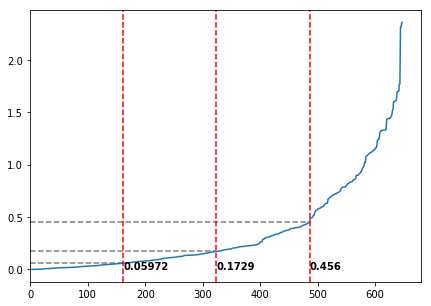

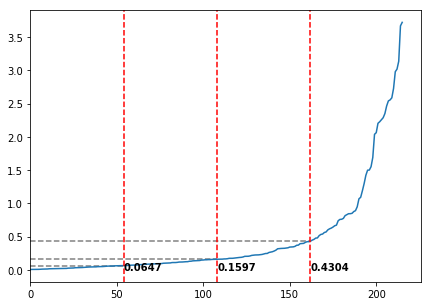

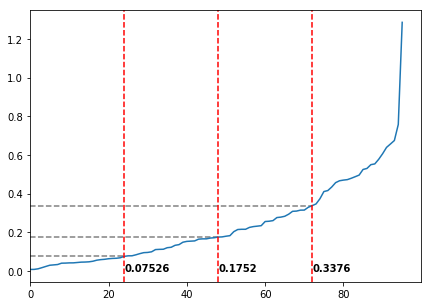

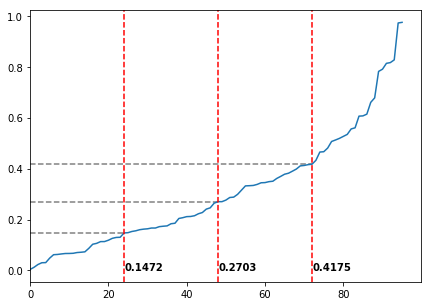

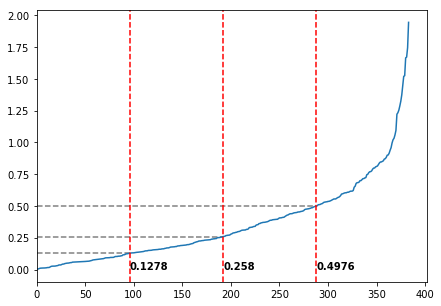

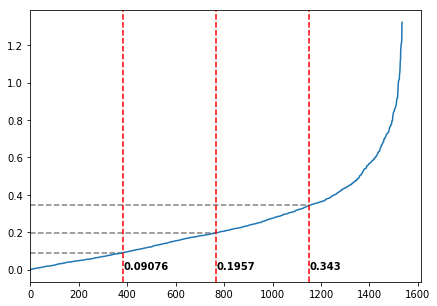

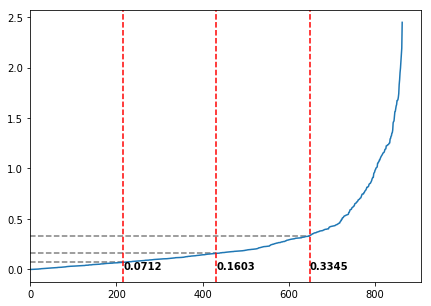

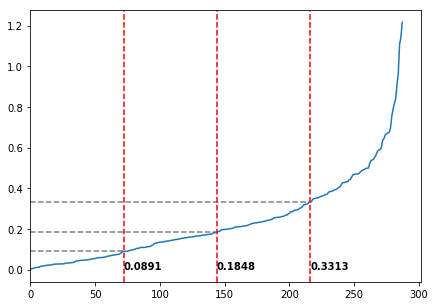

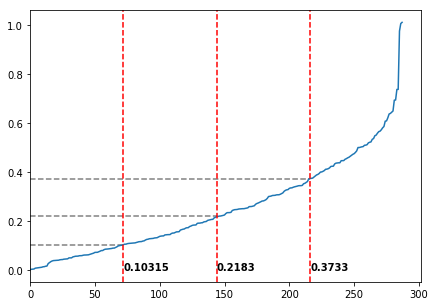

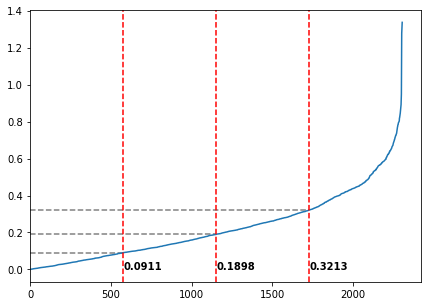

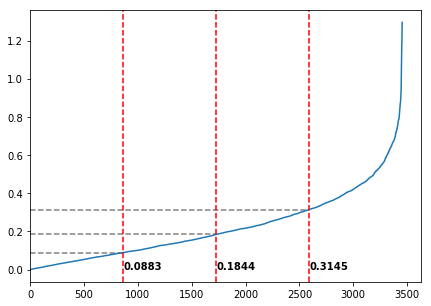

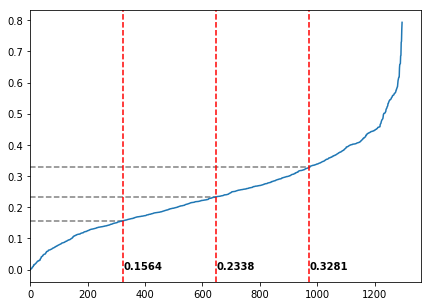

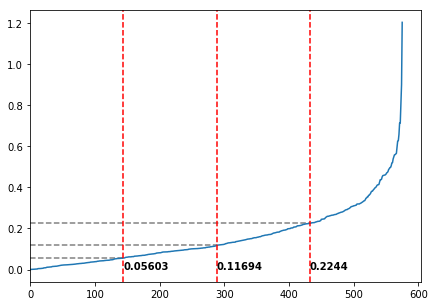

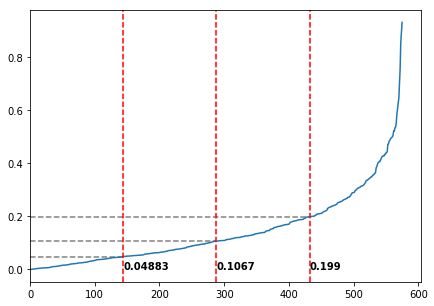

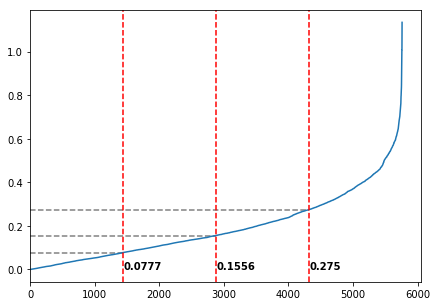

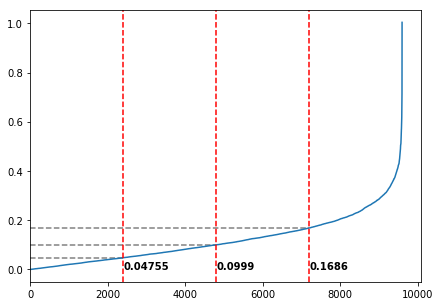

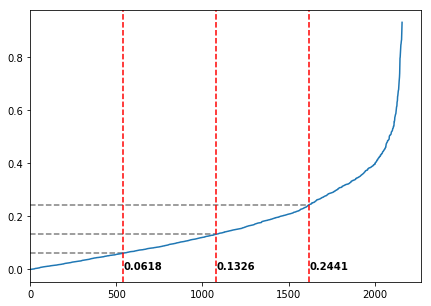

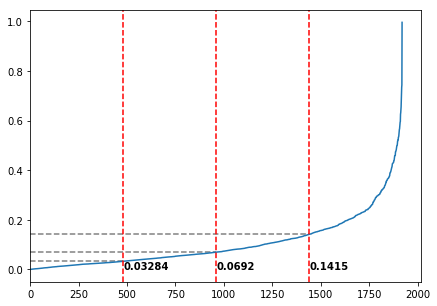

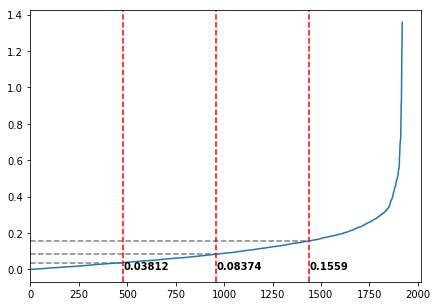

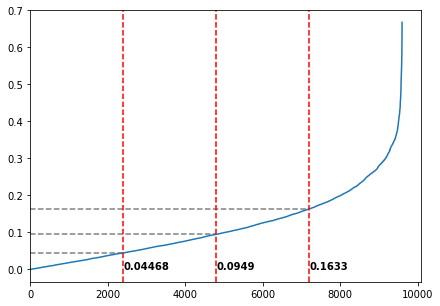

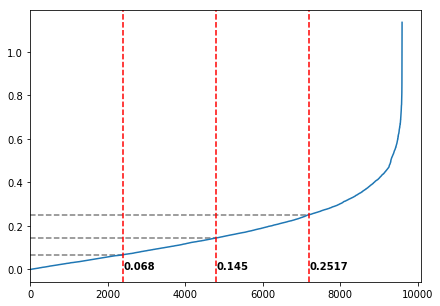

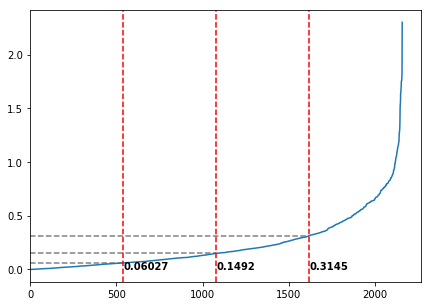

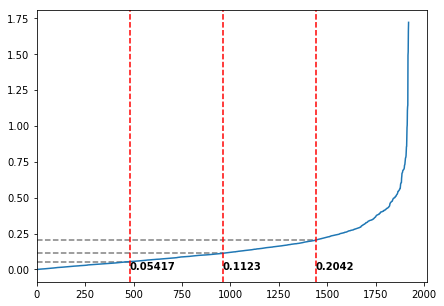

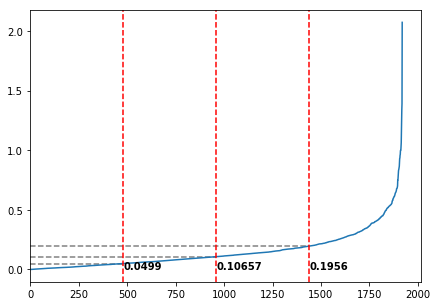

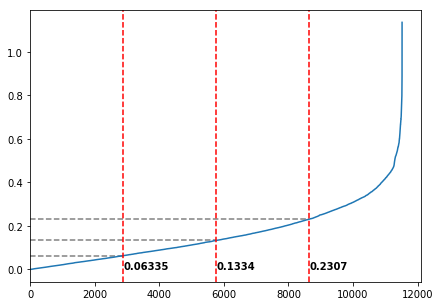

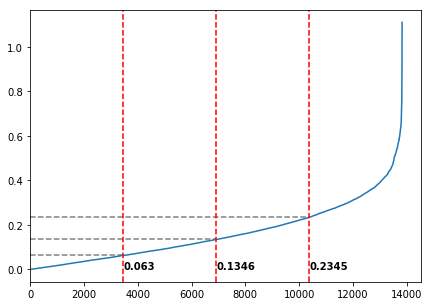

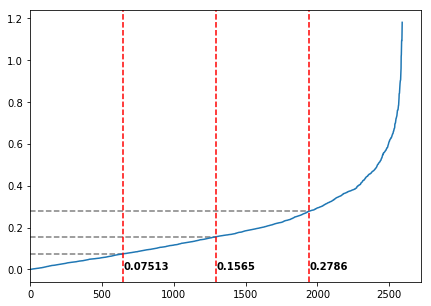

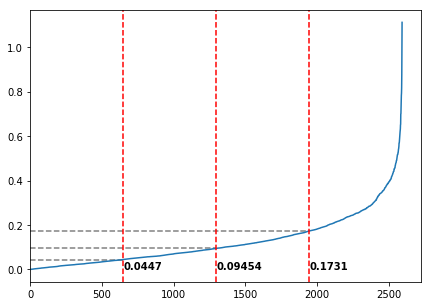

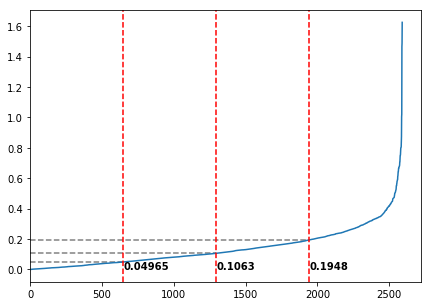

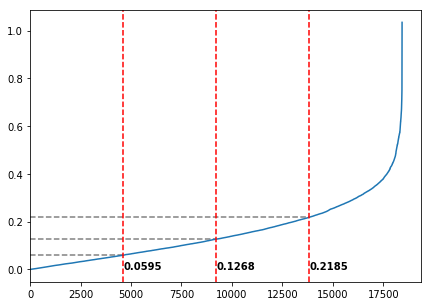

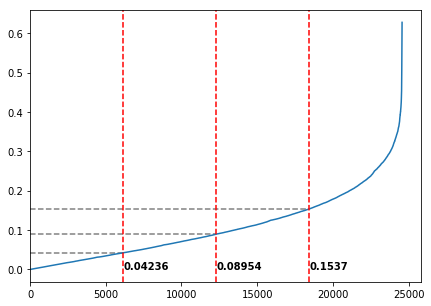

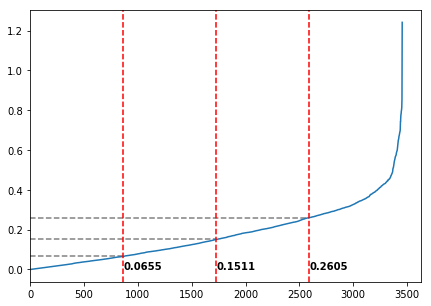

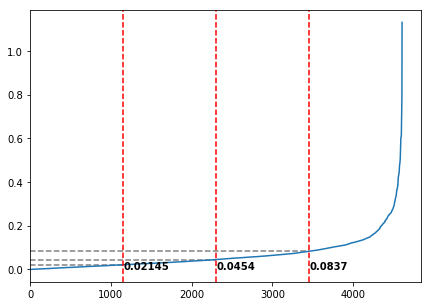

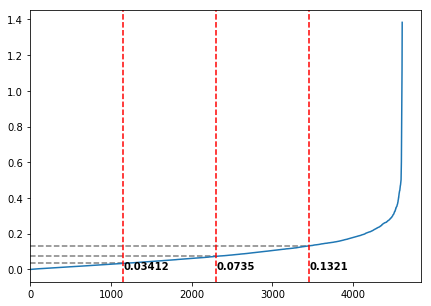

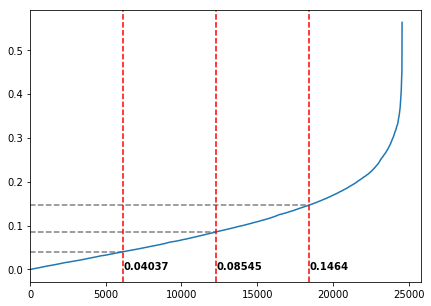

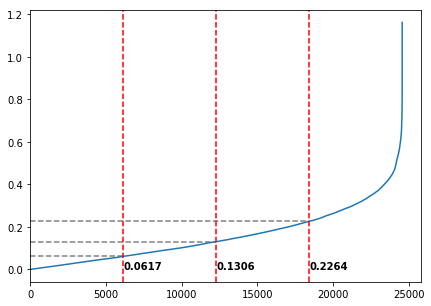

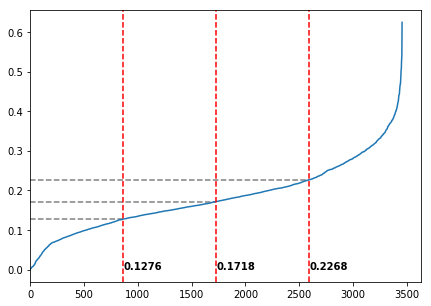

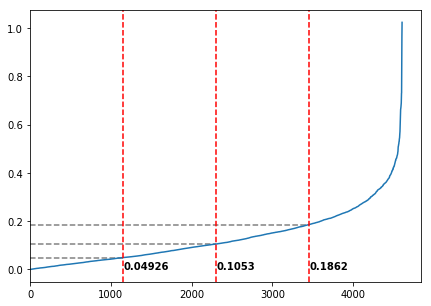

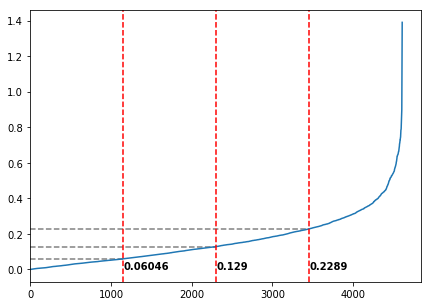

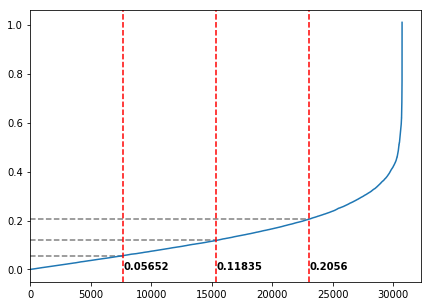

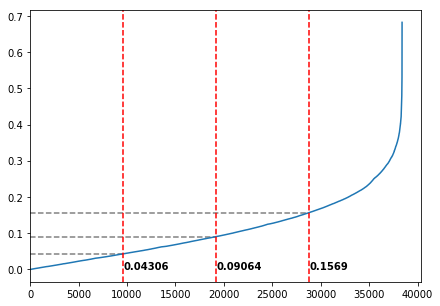

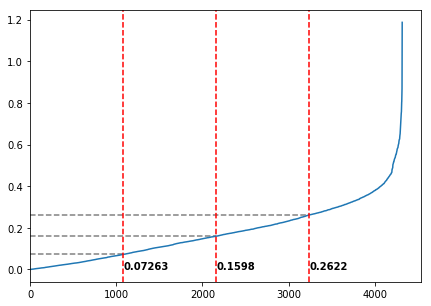

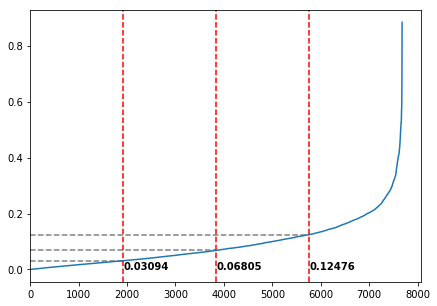

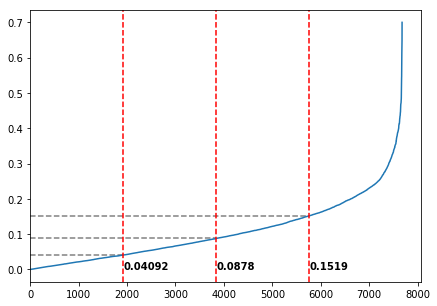

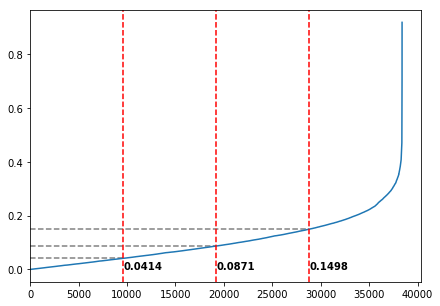

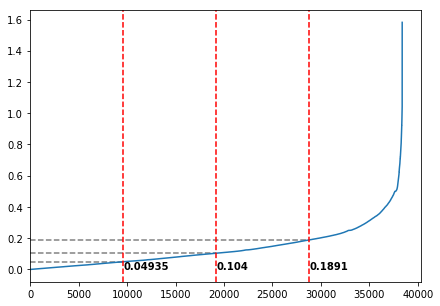

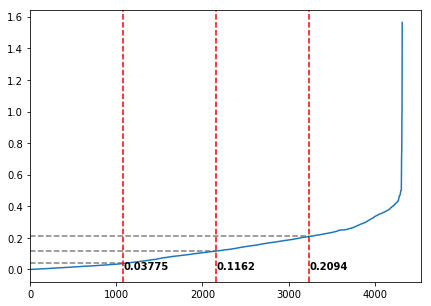

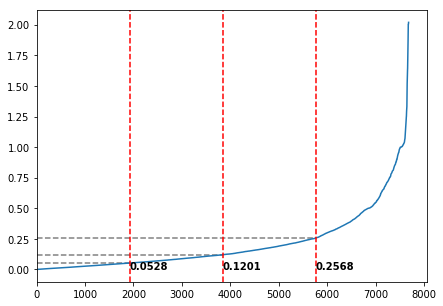

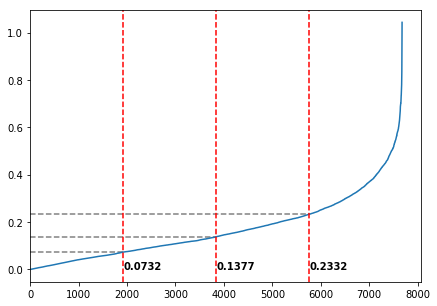

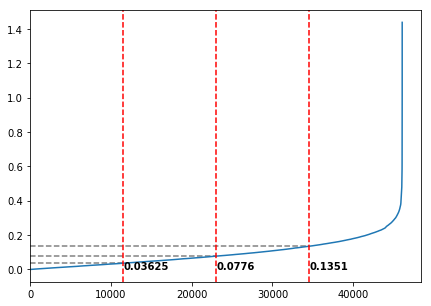

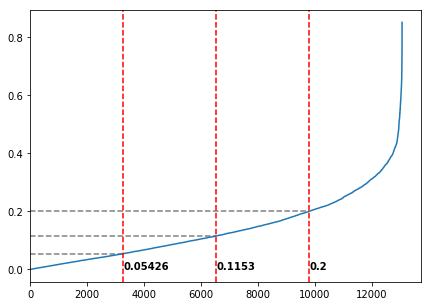

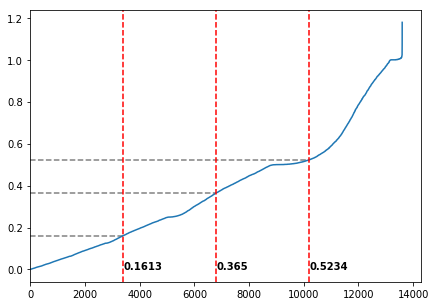

[36.11, 37.96, 33.33, 17.71, 22.4, 28.39, 36.11, 29.51, 26.04, 29.77, 30.15, 11.65, 46.7, 49.48, 33.84, 52.42, 41.34, 64.38, 58.49, 54.74, 37.79, 39.35, 47.4, 49.69, 40.92, 40.62, 34.8, 54.86, 49.58, 42.62, 57.36, 37.82, 82.53, 64.91, 59.61, 41.86, 17.1, 50.09, 41.58, 45.03, 56.5, 34.12, 67.41, 58.23, 58.45, 50.64, 46.18, 45.03, 37.83, 63.85, 46.04, 17.11]
52


In [4]:
import numpy as np

lists = []
all_weights = []

for m, w in model.items():
    if 'weight' in m and 'bn' not in m:
        for v in w.view(-1,):
            all_weights.append(abs(v.cpu().numpy()))
            
percent = 50
threshold = np.percentile(np.array(all_weights), percent)
print('threshold', threshold)

info = []
for m, w in model.items():
    if 'weight' in m and 'bn' not in m:
        weights = []
        sumup = 0
        total = 0
        lists.append(m)
        for v in w.view(-1,):
            tmp = abs(v.cpu().numpy())
            weights.append(tmp)
            if tmp <= threshold:
                sumup += 1
            total += 1
        info.append(round((sumup / total) * 100, 2))
        
        weights = sorted(weights)
        length = len(weights)

        plotting(weights, length)
print(info)
        
'''
plt.axvline(x=length/4, color='r', label='25%', linestyle='--')
plt.hlines(y=weights[length//4], xmin=0.0, xmax=length//4, color='gray', linestyle='--')
plt.text(length/4, -0.1, str(weights[length//4]), color='black', fontweight='bold')

plt.axvline(x=length/2, color='r', label='50%', linestyle='--')
plt.hlines(y=weights[length//2], xmin=0.0, xmax=length//2, color='gray', linestyle='--')
plt.text(length/2, -0.07, str(weights[length//2]), color='black', fontweight='bold')   

plt.axvline(x=length*3/4, color='r', label='75%', linestyle='--')
plt.hlines(y=weights[length*3//4], xmin=0.0, xmax=length*3//4, color='gray', linestyle='--')
plt.text(length*3/4, 0.03, str(weights[length*3//4]), color='black', fontweight='bold')

plt.xlim(0)
plt.show()
'''
print(len(lists))

threshold 0.004543304443359375


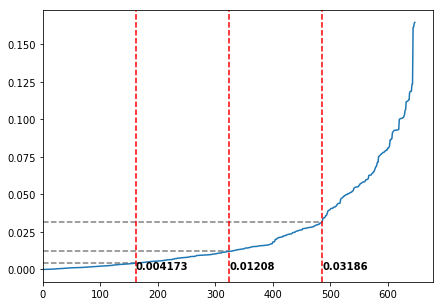

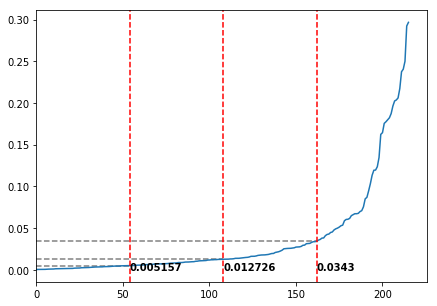

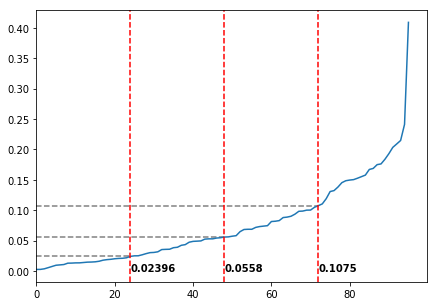

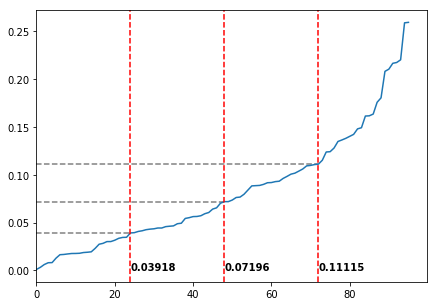

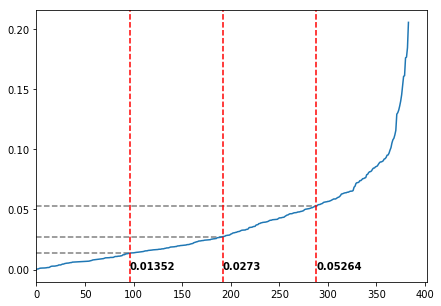

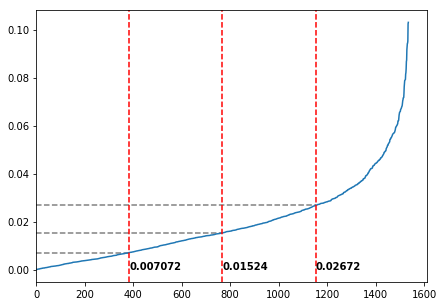

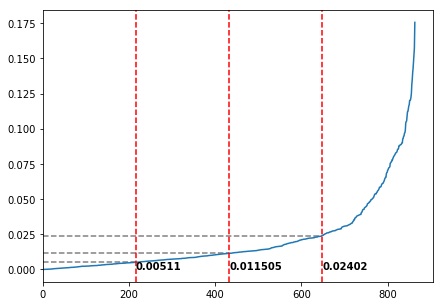

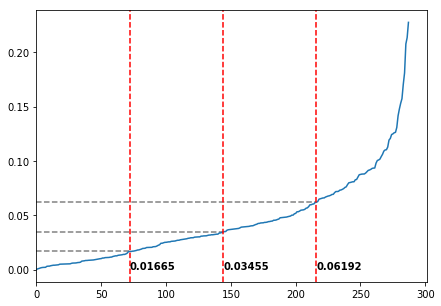

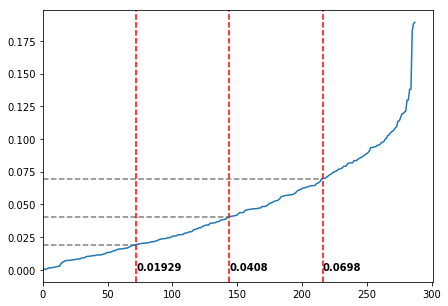

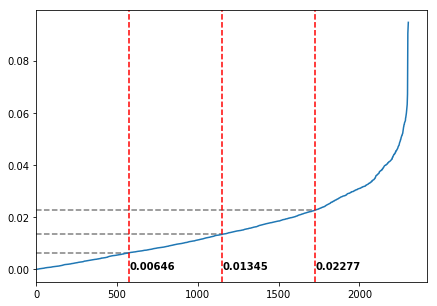

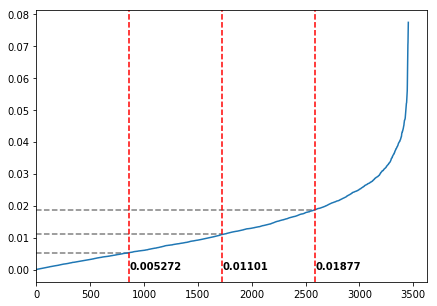

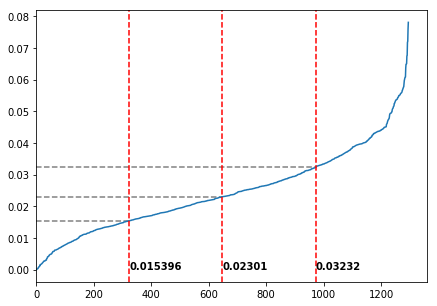

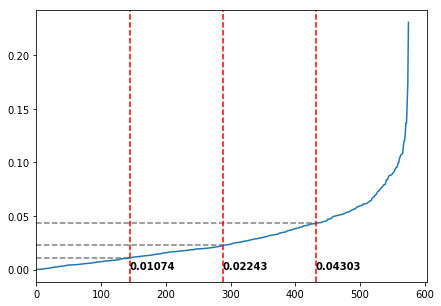

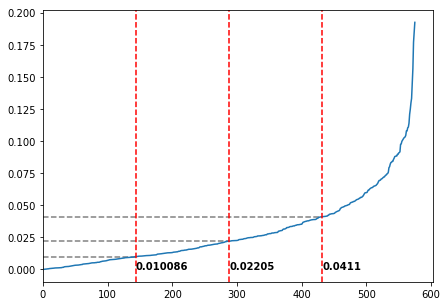

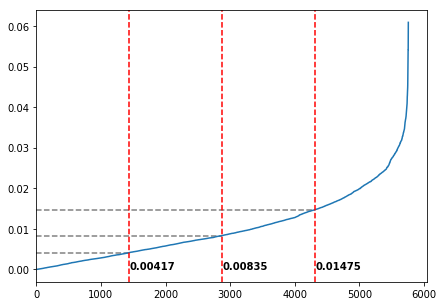

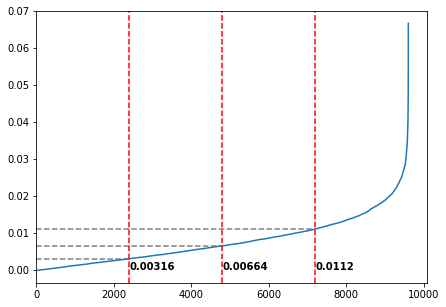

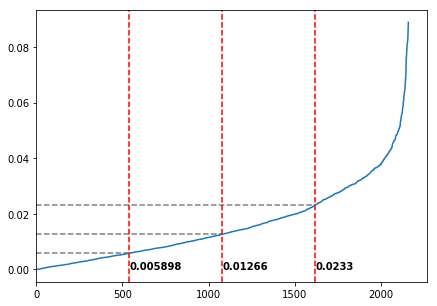

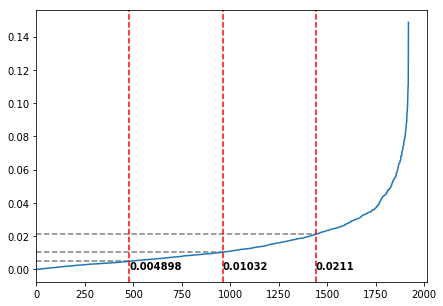

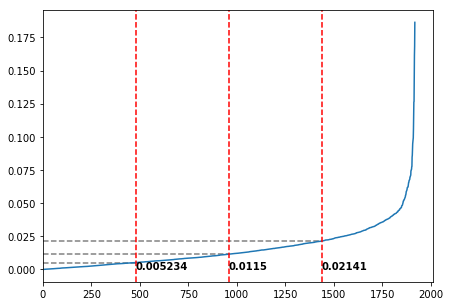

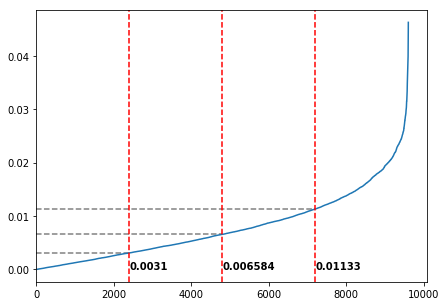

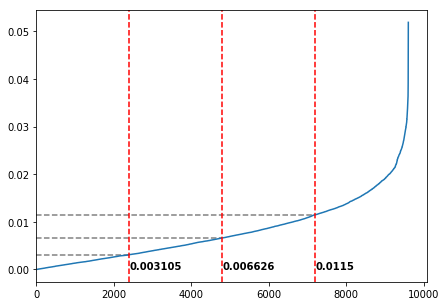

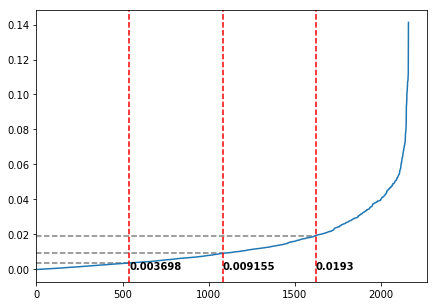

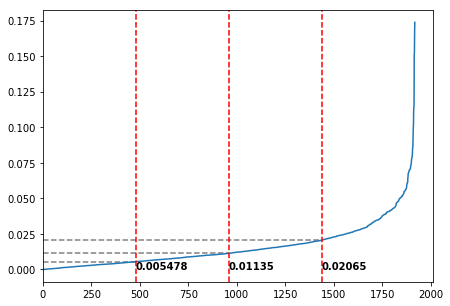

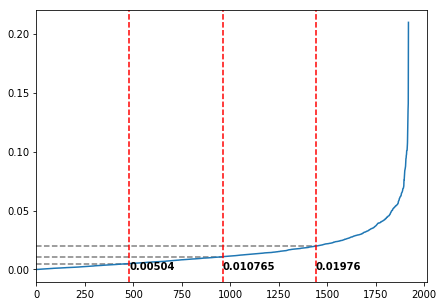

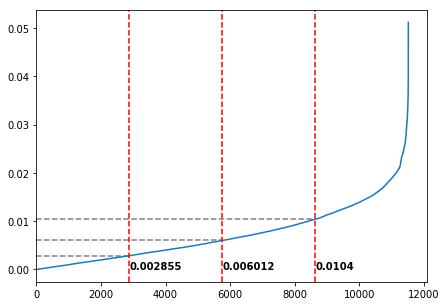

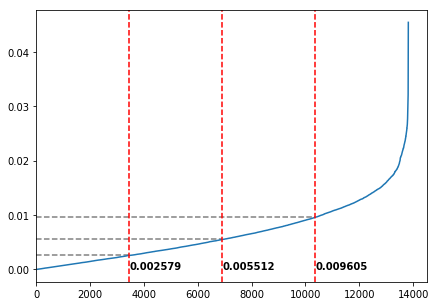

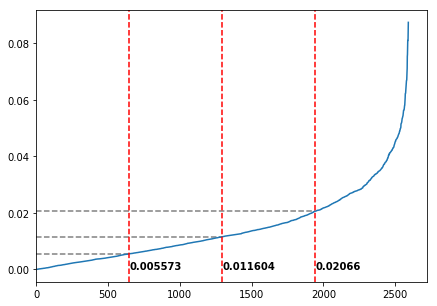

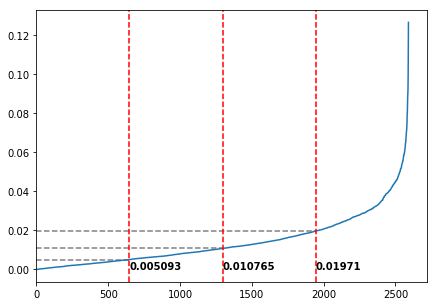

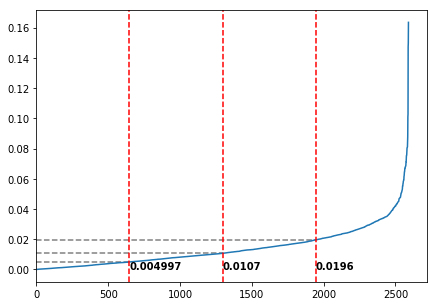

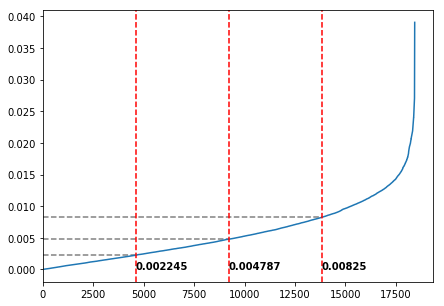

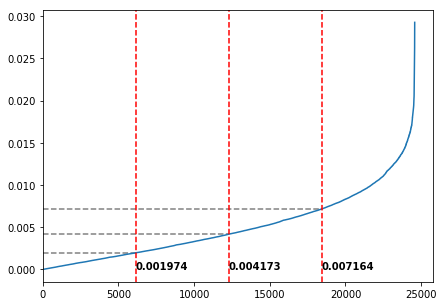

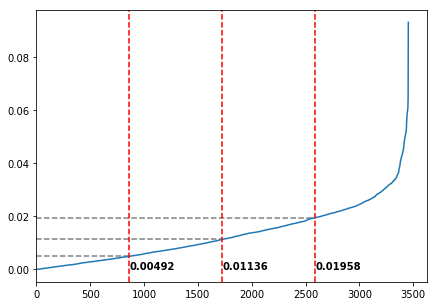

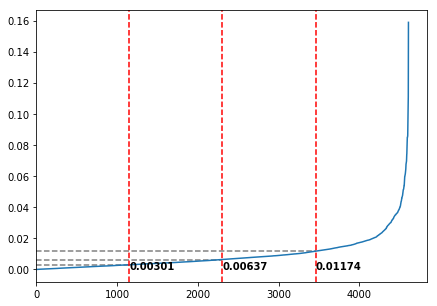

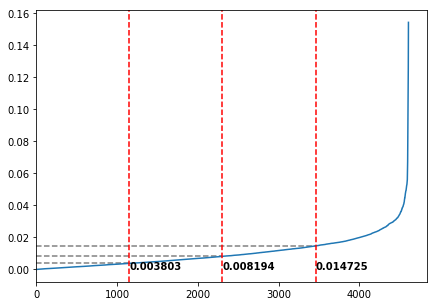

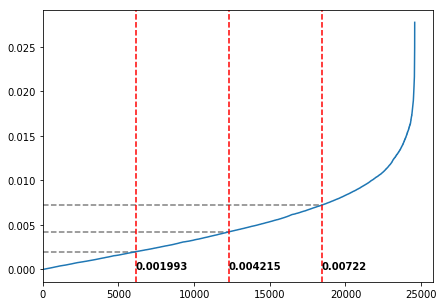

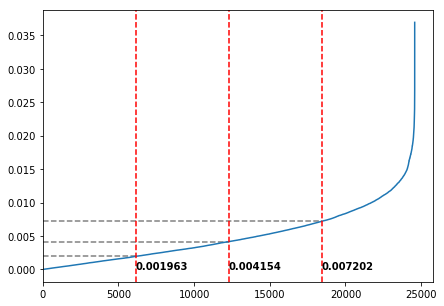

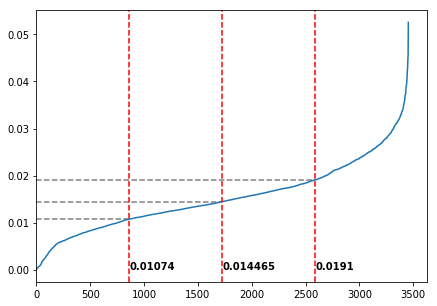

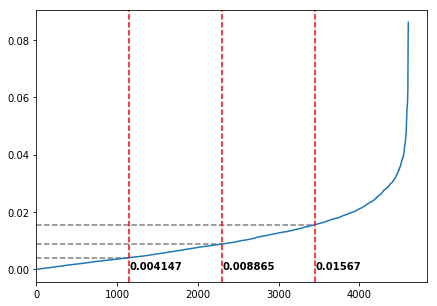

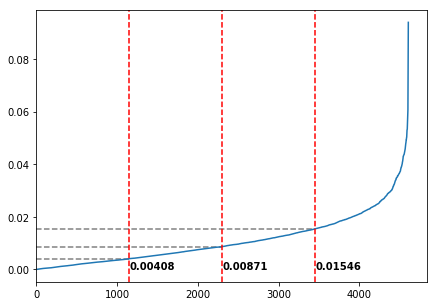

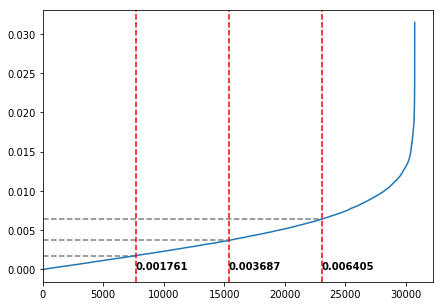

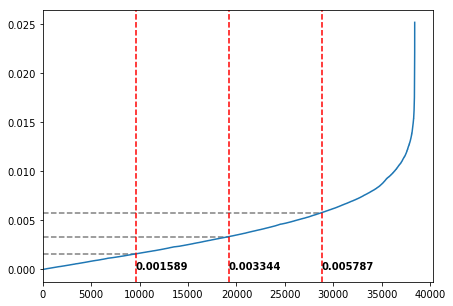

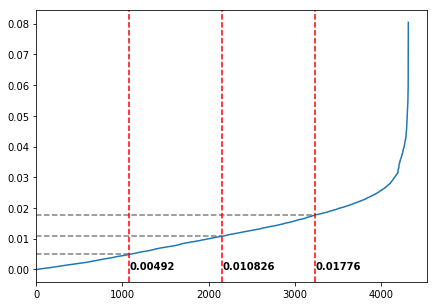

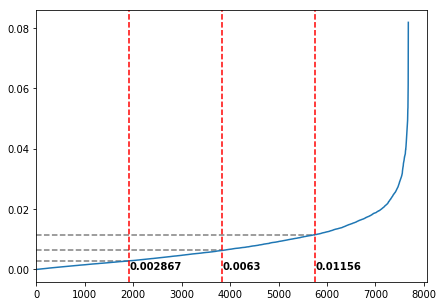

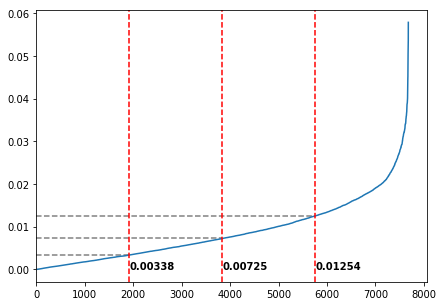

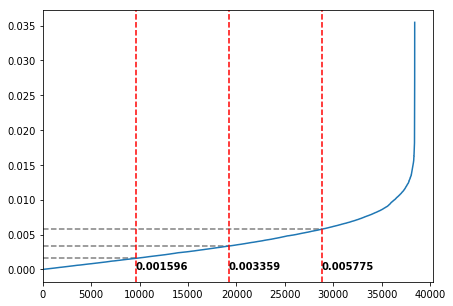

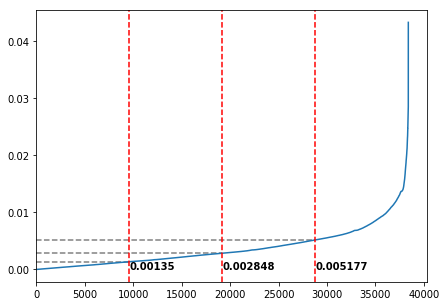

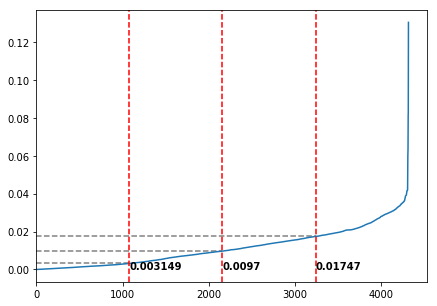

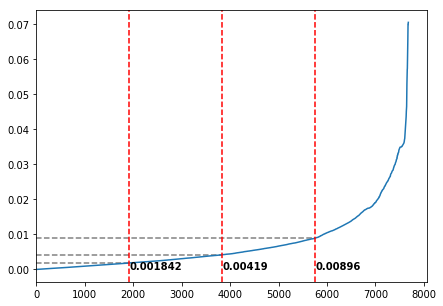

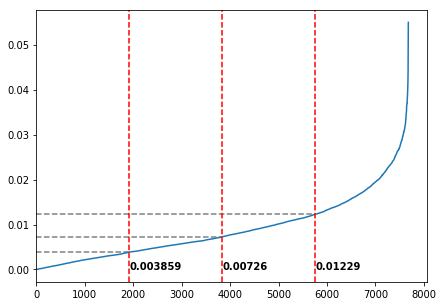

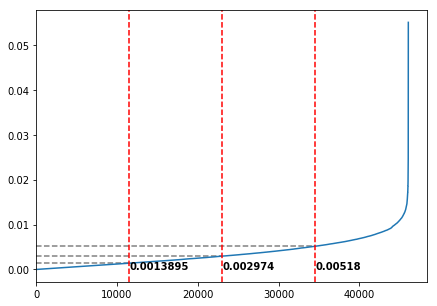

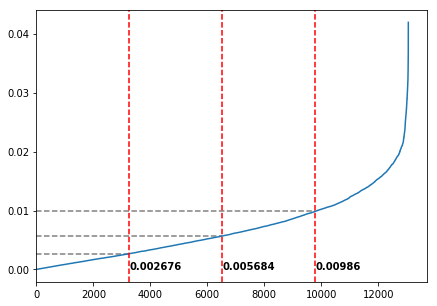

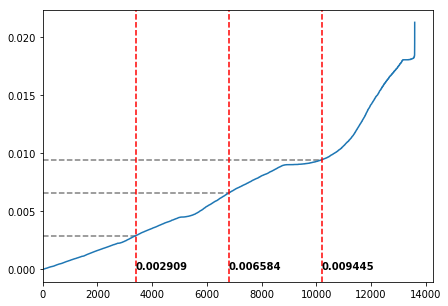

[26.7, 22.69, 3.12, 2.08, 7.55, 16.73, 22.34, 6.25, 4.86, 18.58, 21.24, 3.47, 10.76, 12.15, 27.36, 35.6, 19.44, 23.12, 21.72, 36.19, 35.82, 30.56, 21.04, 22.86, 39.41, 42.51, 20.95, 22.38, 22.72, 47.94, 53.76, 22.89, 37.7, 29.9, 53.32, 53.8, 4.37, 27.82, 27.71, 58.98, 63.4, 23.52, 38.02, 32.99, 63.44, 69.54, 30.65, 52.92, 30.13, 69.19, 40.86, 38.68]
52


In [5]:
import numpy as np
from numpy import linalg as LA

lists = []
all_weights = []
norm = []

for m, w in model.items():
    if 'weight' in m and 'bn' not in m:
        tmp = LA.norm(abs(w.cpu().numpy()).flatten())
        norm.append(tmp)
        all_weights += list(abs(w.cpu().data.numpy()).flatten() / tmp)
        
percent = 50
threshold = np.percentile(np.array(all_weights), percent)
print('threshold', threshold)

idx = 0
info = []
for m, w in model.items():
    if 'weight' in m and 'bn' not in m:
        weights = []
        sumup = 0
        total = 0
        lists.append(m)
        for v in w.view(-1,):
            tmp = abs(v.cpu().numpy())
            weights.append(tmp / norm[idx])
            if tmp / norm[idx] <= threshold:
                sumup += 1
            total += 1
        info.append(round((sumup / total) * 100, 2))
        
        weights = sorted(weights)
        length = len(weights)

        plotting(weights, length)
        idx += 1
        
print(info)
        
'''
plt.axvline(x=length/4, color='r', label='25%', linestyle='--')
plt.hlines(y=weights[length//4], xmin=0.0, xmax=length//4, color='gray', linestyle='--')
plt.text(length/4, -0.1, str(weights[length//4]), color='black', fontweight='bold')

plt.axvline(x=length/2, color='r', label='50%', linestyle='--')
plt.hlines(y=weights[length//2], xmin=0.0, xmax=length//2, color='gray', linestyle='--')
plt.text(length/2, -0.07, str(weights[length//2]), color='black', fontweight='bold')   

plt.axvline(x=length*3/4, color='r', label='75%', linestyle='--')
plt.hlines(y=weights[length*3//4], xmin=0.0, xmax=length*3//4, color='gray', linestyle='--')
plt.text(length*3/4, 0.03, str(weights[length*3//4]), color='black', fontweight='bold')

plt.xlim(0)
plt.show()
'''
print(len(lists))

In [6]:
fpath = '../results/trained_models/final_baseline_notreset_gradually_pruned_weight_50.00_iterative_rounds_2/trained_model.pth'
model = torch.load(fpath)
model

OrderedDict([('_conv_stem.weight',
              tensor([[[[-2.4329e-01, -2.6196e-01, -7.3547e-02],
                        [-2.3865e-01, -2.5415e-01, -6.6345e-02],
                        [-9.4788e-02,  0.0000e+00,  1.9458e-01]],
              
                       [[-6.1182e-01, -6.1426e-01,  1.1578e-01],
                        [-6.1914e-01, -6.1475e-01,  1.1572e-01],
                        [ 1.5344e-01,  1.4514e-01,  1.3928e-01]],
              
                       [[ 1.6904e+00,  1.6865e+00, -3.5767e-01],
                        [ 1.6865e+00,  1.6963e+00, -3.5815e-01],
                        [-3.4180e-01, -3.4326e-01, -2.4585e-01]]],
              
              
                      [[[ 1.6992e+00,  1.6943e+00, -1.3440e-01],
                        [ 1.6934e+00,  1.7031e+00, -1.3623e-01],
                        [-1.6296e-01, -1.7053e-01, -2.1765e-01]],
              
                       [[-7.4023e-01, -7.3633e-01,  6.9946e-02],
                        [-7.5049e-01, -7

threshold 0.10107421875


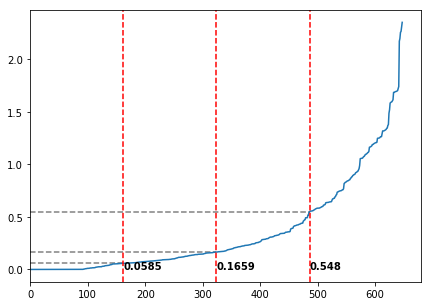

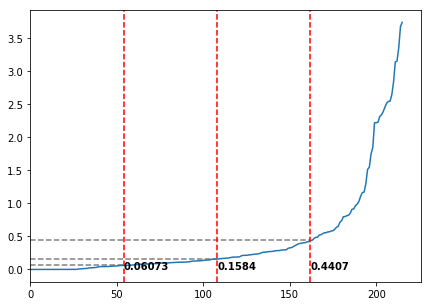

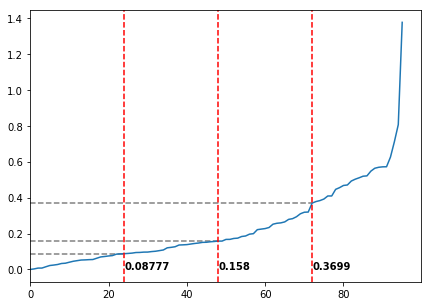

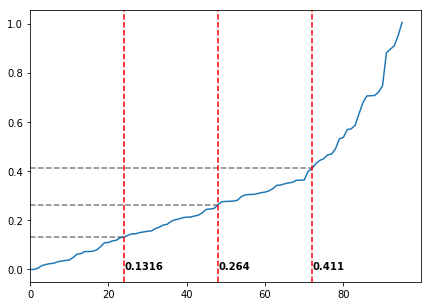

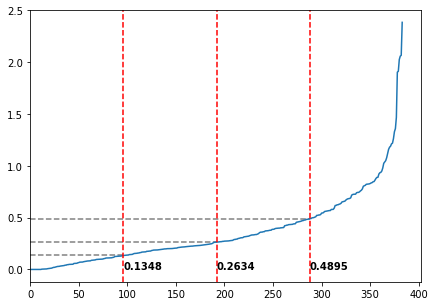

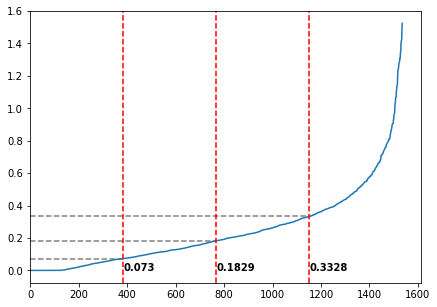

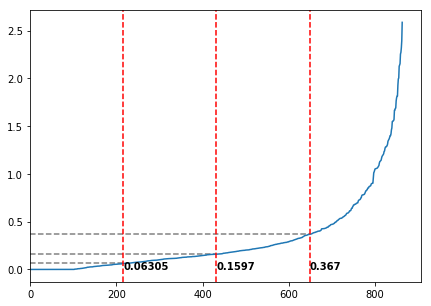

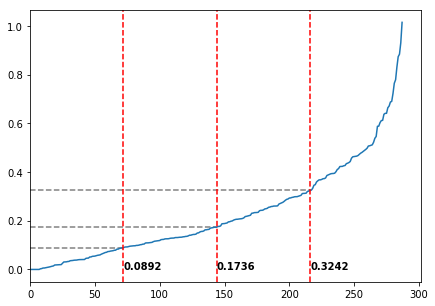

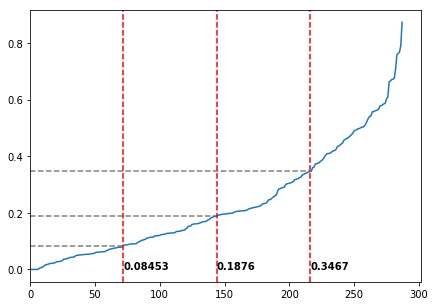

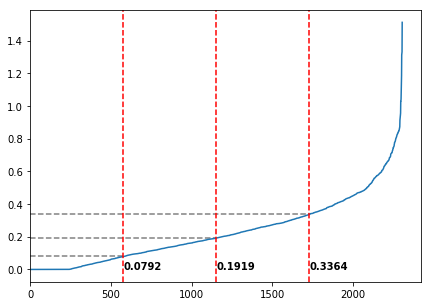

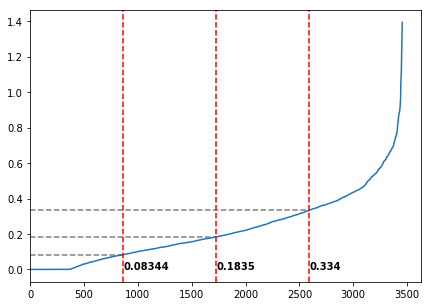

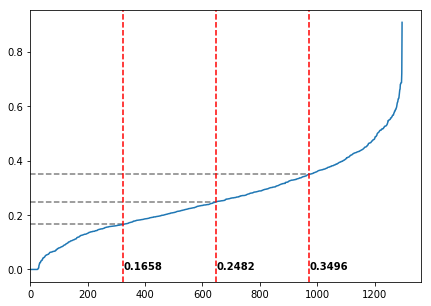

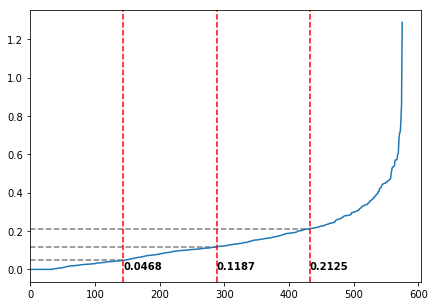

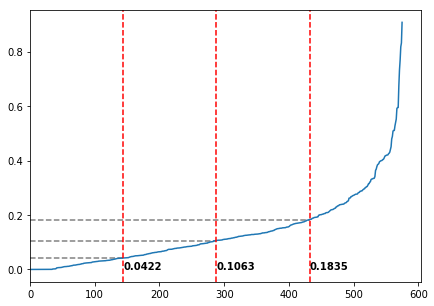

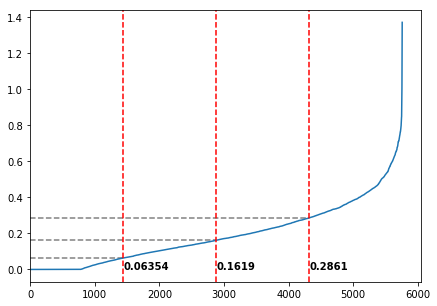

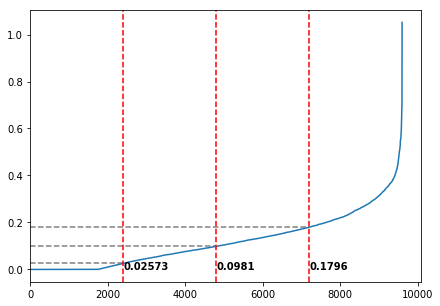

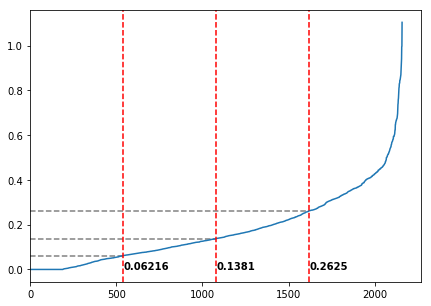

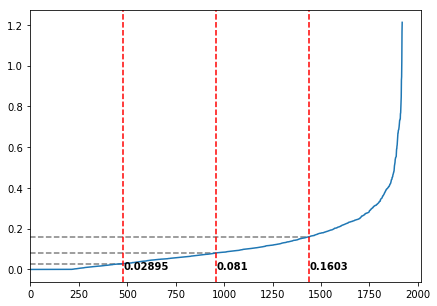

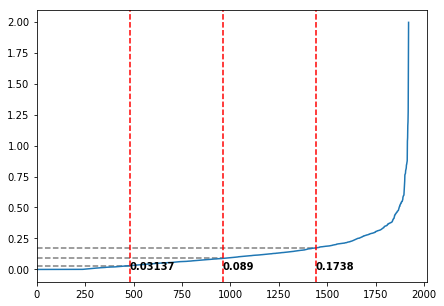

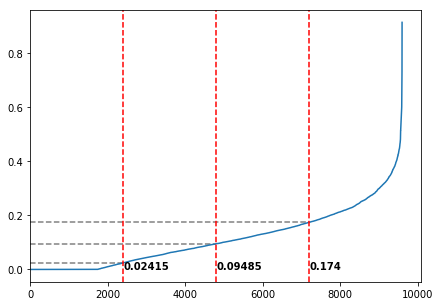

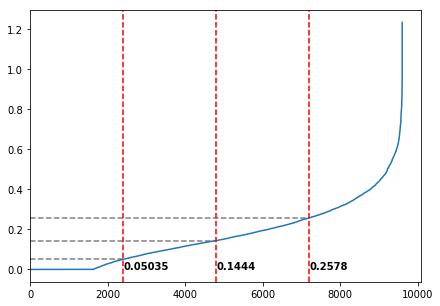

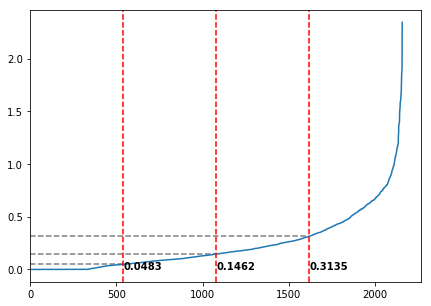

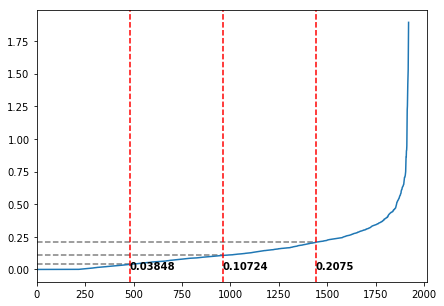

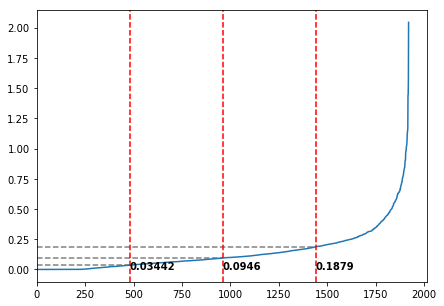

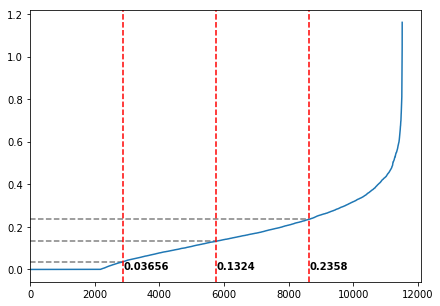

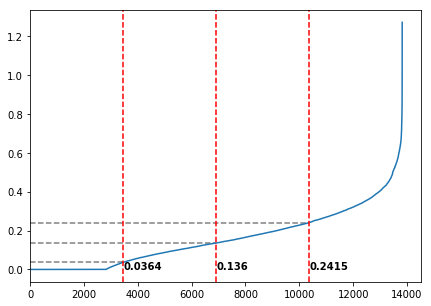

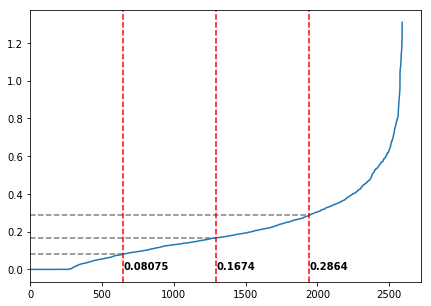

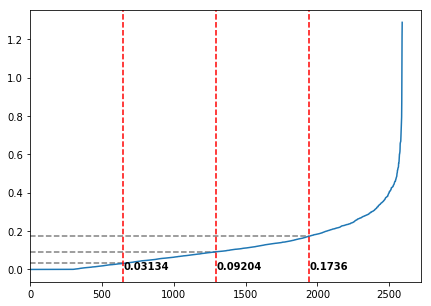

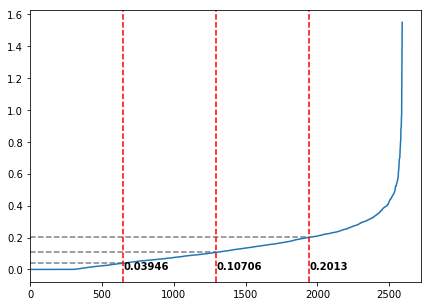

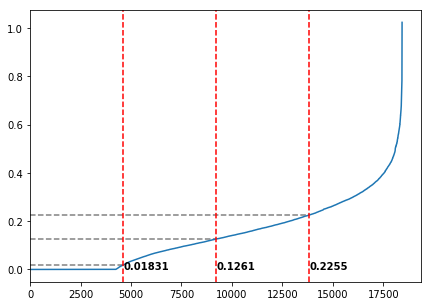

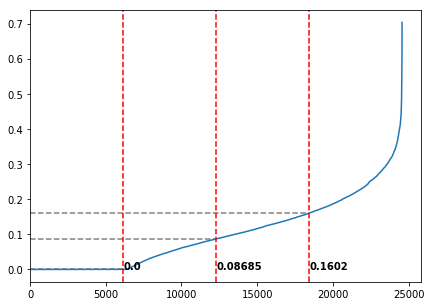

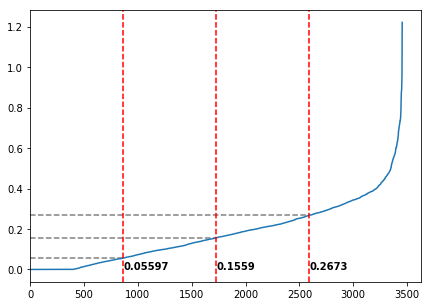

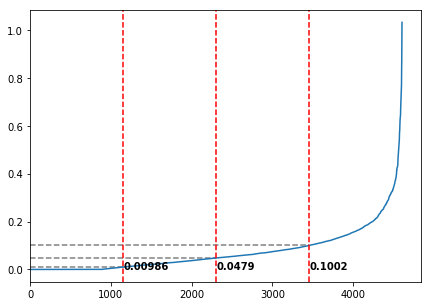

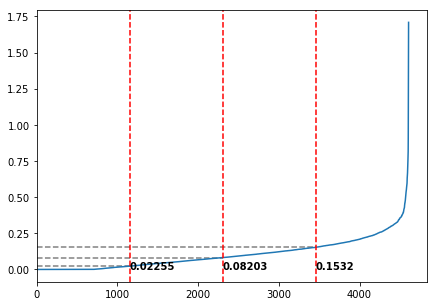

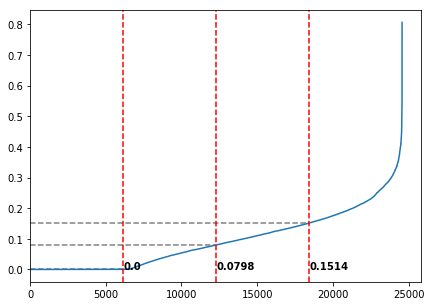

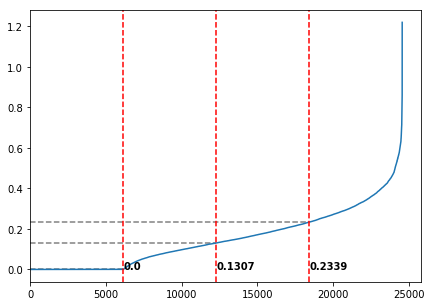

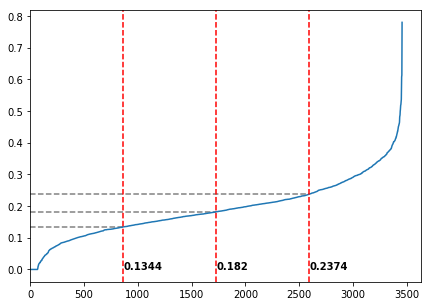

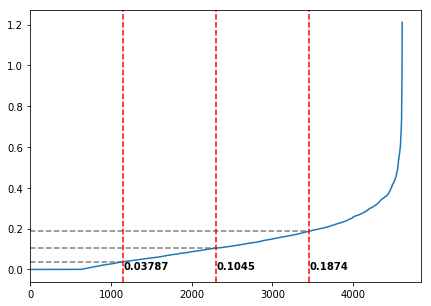

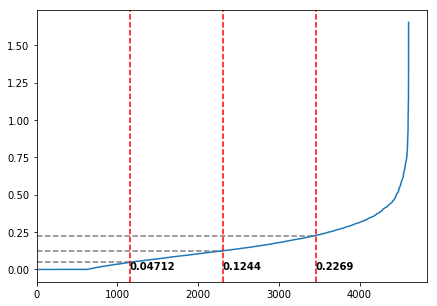

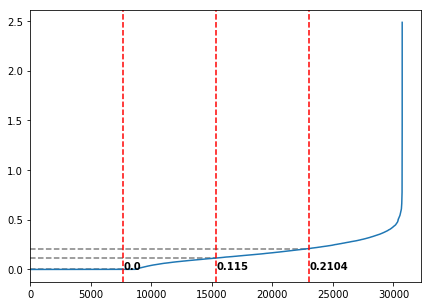

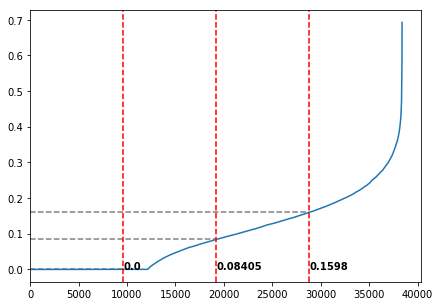

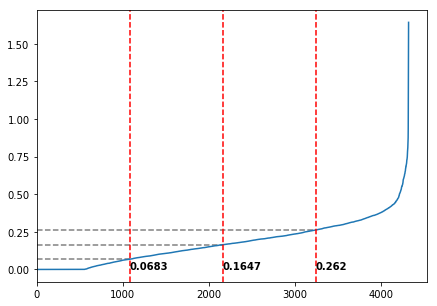

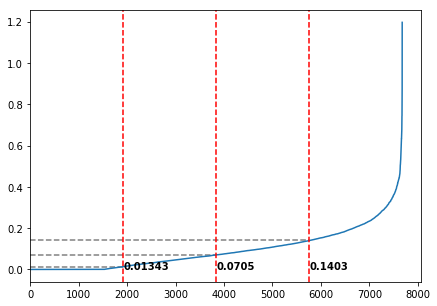

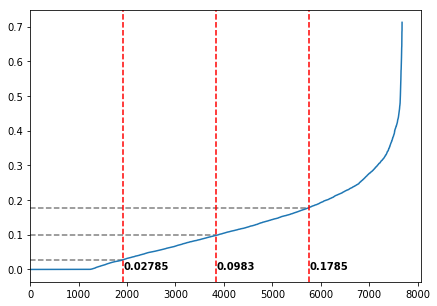

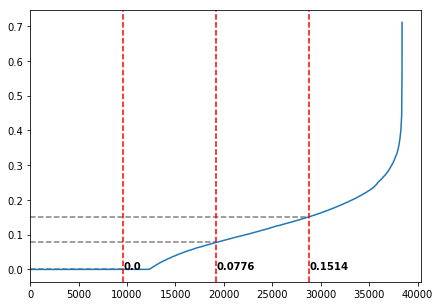

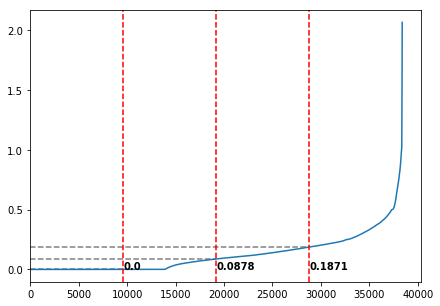

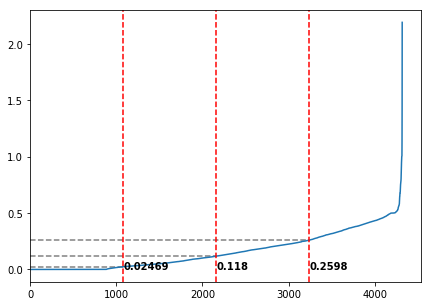

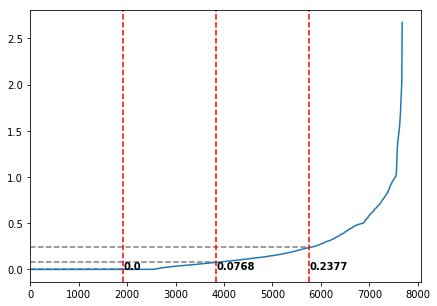

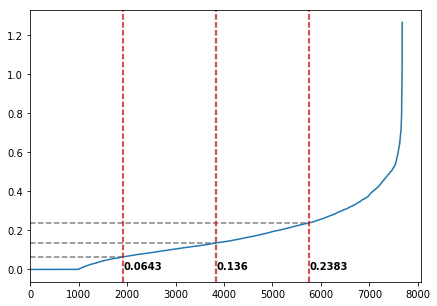

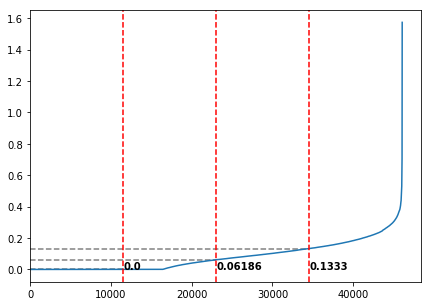

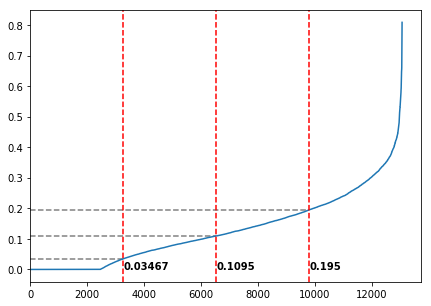

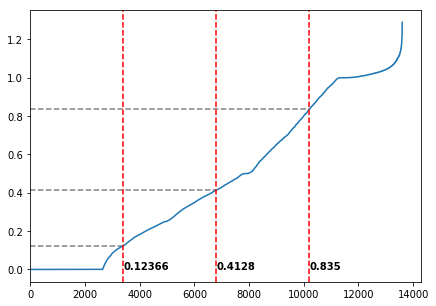

[38.43, 37.5, 33.33, 19.79, 19.53, 31.97, 34.72, 29.51, 29.86, 29.95, 29.02, 10.49, 42.19, 48.44, 34.22, 51.01, 38.29, 58.28, 54.17, 52.28, 37.62, 40.23, 47.55, 52.92, 41.54, 39.89, 30.94, 53.78, 48.07, 42.89, 55.48, 36.57, 75.22, 57.42, 57.87, 41.7, 12.93, 48.39, 42.32, 45.97, 56.03, 32.85, 62.55, 50.91, 58.39, 54.1, 46.32, 55.74, 37.77, 64.65, 46.78, 23.11]


In [7]:
import numpy as np

lists = []
all_weights = []

for m, w in model.items():
    if 'weight' in m and 'bn' not in m:
        for v in w.view(-1,):
            all_weights.append(abs(v.cpu().numpy()))
            
percent = 50
threshold = np.percentile(np.array(all_weights), percent)
print('threshold', threshold)

info = []
for m, w in model.items():
    if 'weight' in m and 'bn' not in m:
        weights = []
        sumup = 0
        total = 0
        lists.append(m)
        for v in w.view(-1,):
            tmp = abs(v.cpu().numpy())
            weights.append(tmp)
            if tmp <= threshold:
                sumup += 1
            total += 1
        info.append(round((sumup / total) * 100, 2))
        
        weights = sorted(weights)
        length = len(weights)

        plotting(weights, length)
print(info)